In [1]:
#imports
import scipy.io
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

import seaborn as sns

from scipy import stats

from matplotlib import pyplot as plt

import statsmodels.api as sm

In [2]:
# Read data
from pandas import read_csv
data = read_csv('data_update.csv', sep= ';')
# pick only useful columns
data = data[['age_beh', 'LF_M']]

In [3]:
#Make arrays of the words produced so you can work with it

data['LF_M'] = data['LF_M'].apply(lambda s : s.split(','))

In [4]:
#count the amount of M's and add it to the dataframe
M_count = []

for i in range (0, len(data)):
    M_count.append(len(data.iloc[i,1]))
    
print(M_count)
data.insert(2, "M_count", M_count)

[18, 18, 36, 21, 16, 23, 26, 20, 16, 14, 18, 21, 19, 21, 18, 28, 24, 18, 26, 17, 10, 10, 22, 5, 25, 15, 14, 20, 15, 13, 12, 20, 15, 17, 11, 21, 21, 21, 23, 8, 18]


In [5]:
one_sound = ['a', 'e', 'o', 'u', 'i']
two_sound = ['aa', 'ee', 'oo', 'uu', 'ae', 'ai', 'au', 'ei', 'eu', 'ie', 'oe', 'oi', 'ou', 'ui']
three_sound = ['aai', 'ieu', 'ooi', 'oei']
    
def get_syl(word, count):
    if word[0] in one_sound:
        if word[0:2] in two_sound:
            if word[0:3] in three_sound:
                count+=1
                if len(word)>3:
                     return get_syl(word[3:], count)
                else: return count
            else: 
                count+=1
                if len(word)>2:
                    return get_syl(word[2:], count)
                else: 
                    return count
        else:
            count+=1
            if len(word)>1:
                return get_syl(word[1:], count)
            else: 
                return count
    else:
        if len(word) == 1:
            return count
        if len(word)>0:
            return get_syl(word[1:], count)
        else: 
            return count
    return count

In [6]:
M_long = []

for lists in data['LF_M']:
    count_long = 0
    count_short = 0
    for word in lists:
        if get_syl(word,0) > 1:
            count_long+=1
        elif get_syl(word,0)== 1:
            count_short+=1
    M_long.append(count_long)

In [7]:
data.insert(3, "M_long", M_long)

<AxesSubplot:xlabel='M_count', ylabel='M_long'>

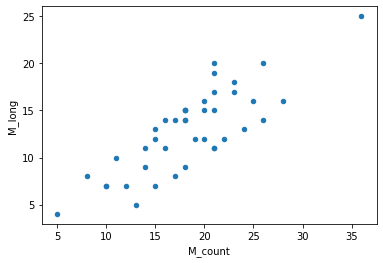

In [8]:
data.plot.scatter('M_count', 'M_long')

In [9]:
check = data[['M_count', 'M_long']]
check.corr()

,M_count,M_long
M_count,1.000000,0.815395
M_long,0.815395,1.000000


In [10]:
stats.ttest_rel(data[['M_count']], data[['M_long']])

Ttest_relResult(statistic=array([10.49687792]), pvalue=array([4.68240608e-13]))

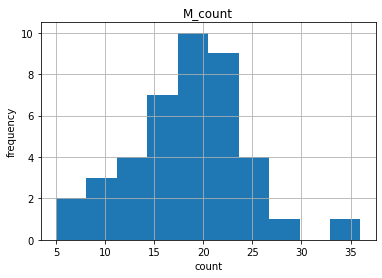

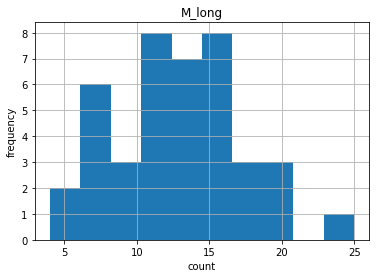

In [11]:
data.hist('M_count')
plt.xlabel('count')
plt.ylabel('frequency')
plt.show()


data.hist('M_long')
plt.xlabel('count')
plt.ylabel('frequency')
plt.show()

In [12]:
age_cat = []

for age in data['age_beh']:
    n = 0
    if age < 30:
        n=0
    if age > 50:
        n=1
    age_cat.append(n)

In [13]:
data.insert(4, "age_cat", age_cat)

In [22]:
y = data['M_count']
x = data[['age_cat', 'M_long']]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                M_count   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     45.37
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           8.55e-11
Time:                        11:15:34   Log-Likelihood:                -104.64
No. Observations:                  41   AIC:                             215.3
Df Residuals:                      38   BIC:                             220.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3184      1.949      3.755      0.0